In [1]:
from keras.layers import Input, Lambda, Dense, Flatten , GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# data loading by using keras
training_set = tf.keras.utils.image_dataset_from_directory(
    'new_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11354 files belonging to 30 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4228 files belonging to 30 classes.


In [4]:
# Load the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Freeze all the dence layers
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Define the model
from tensorflow.keras.layers import Dropout , GlobalAveragePooling2D
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # flatten()
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,270,750 (58.25 MB)

 Trainable params: 556,062 (2.12 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
# Compile the model
from tensorflow.keras.optimizers import Adam
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from keras.callbacks import  EarlyStopping
callback =EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=45,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True, # false
    start_from_epoch=0
)

In [10]:
# Fit the model
training_model=model.fit(training_set, epochs=150, validation_data=validation_set , callbacks=callback)

Epoch 1/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 2702s 8s/step - accuracy: 0.0534 - loss: 8.0109 - val_accuracy: 0.3063 - val_loss: 2.4636
Epoch 2/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 1620s 5s/step - accuracy: 0.1671 - loss: 4.5921 - val_accuracy: 0.5859 - val_loss: 1.4113
Epoch 3/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 1616s 5s/step - accuracy: 0.3147 - loss: 3.0750 - val_accuracy: 0.7330 - val_loss: 0.9223
Epoch 4/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 1663s 5s/step - accuracy: 0.4486 - loss: 2.1538 - val_accuracy: 0.8065 - val_loss: 0.6675
Epoch 5/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 1642s 5s/step - accuracy: 0.5631 - loss: 1.5530 - val_accuracy: 0.8512 - val_loss: 0.5202
Epoch 6/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 961s 3s/step - accuracy: 0.6493 - loss: 1.2168 - val_accuracy: 0.8843 - val_loss: 0.4212
Epoch 7/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 1054s 3s/step - accuracy: 0.7167 - loss: 0.9383 - val_accuracy: 0.8976 - val_loss: 0.3631
Epoch 8/150
355/355 ━━━━━━━━━━━━━━━━━━━━ 1174s 3s/step - accuracy: 0.7536 - loss: 0.

In [11]:
# model evaluation on training set

training_loss , train_accuracy = model.evaluate(training_set)

355/355 ━━━━━━━━━━━━━━━━━━━━ 825s 2s/step - accuracy: 1.0000 - loss: 1.3954e-04


In [ ]:
# model evaluation on validation set

validation_loss , validation_accuracy = model.evaluate(validation_set)

133/133 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.9933 - loss: 0.0203


In [13]:
tf.keras.callbacks.History()

In [14]:
training_model.history

{'accuracy': [0.07618460804224014,
  0.20459750294685364,
  0.35626211762428284,
  0.48229697346687317,
  0.5917738080024719,
  0.6675180792808533,
  0.7294345498085022,
  0.771446168422699,
  0.8044741749763489,
  0.8287827968597412,
  0.8566144108772278,
  0.8771358132362366,
  0.8877047896385193,
  0.9033820629119873,
  0.9078738689422607,
  0.9211731553077698,
  0.927954912185669,
  0.9370266199111938,
  0.9444248676300049,
  0.9494451284408569,
  0.9513827562332153,
  0.9579002857208252,
  0.9584287405014038,
  0.96186363697052,
  0.9700546264648438,
  0.9671481251716614,
  0.9750748872756958,
  0.9731371998786926,
  0.9767482876777649,
  0.9771006107330322,
  0.9793905019760132,
  0.9813281893730164,
  0.9802712798118591,
  0.9812400937080383,
  0.9858199954032898,
  0.9853795766830444,
  0.9866126179695129,
  0.9890787601470947,
  0.9896072149276733,
  0.989342987537384,
  0.9885503053665161,
  0.9896952509880066,
  0.9909282922744751,
  0.9909282922744751,
  0.9905760288238525,

In [15]:
# record the history in json format

import json
with open("training_hist_VGG16_version_2.json" , "w") as f:
    json.dump(training_model.history , f)

In [16]:
# viz

epochs = [i for i in range(1,151)]
epochs

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150]

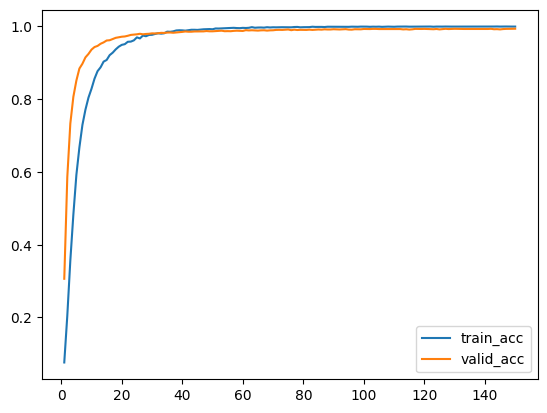

In [17]:
plt.plot(epochs,training_model.history['accuracy'] , label = 'train_acc')
plt.plot(epochs,training_model.history['val_accuracy'] , label='valid_acc')
plt.legend()
plt.show()

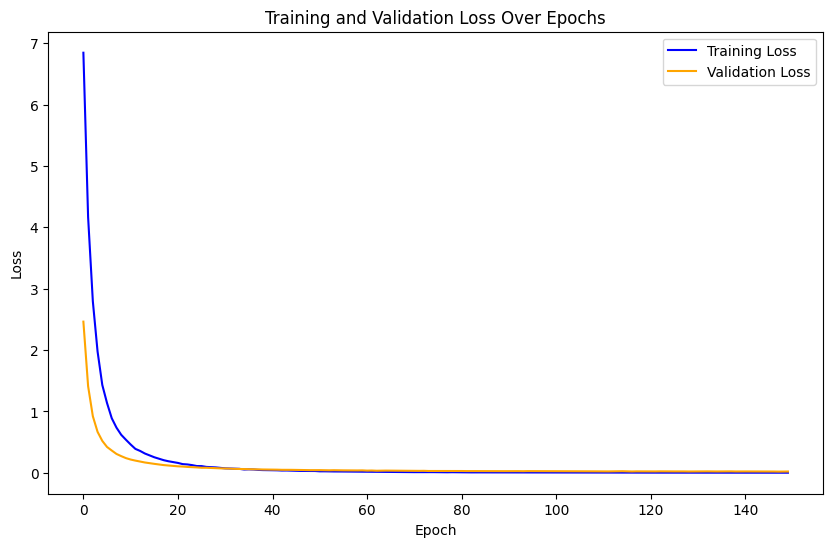

In [20]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from the file
with open(r'D:\MedicalPlant\training_hist_VGG16_version_2.json') as f:
    data = json.load(f)

# Extract loss and validation loss
loss = data['loss']
val_loss = data['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')

# Add titles and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


In [21]:
class_name = validation_set.class_names
class_name

['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

In [22]:
test_set =tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=False,# one by one check all the directory
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4228 files belonging to 30 classes.


In [23]:
y_pred = model.predict(test_set)
y_pred

133/133 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step


array([[9.99956489e-01, 1.39816657e-11, 6.56478116e-09, ...,
        5.51160213e-07, 1.39117055e-05, 3.27824843e-08],
       [9.99983668e-01, 9.62763549e-12, 7.72989284e-10, ...,
        4.04695690e-08, 5.23718109e-06, 1.40576626e-08],
       [9.99987245e-01, 5.11189480e-10, 7.04732162e-10, ...,
        5.95668332e-08, 2.80232780e-06, 3.54972656e-07],
       ...,
       [4.75983413e-08, 1.29752195e-07, 4.70839479e-11, ...,
        3.04743153e-05, 7.92685140e-10, 9.99845505e-01],
       [2.75120708e-08, 7.00636861e-07, 4.06963935e-10, ...,
        3.67663633e-05, 4.79700057e-10, 9.99678493e-01],
       [9.84044206e-08, 3.16851434e-08, 2.49041781e-12, ...,
        3.95057424e-12, 7.73300521e-12, 9.99992371e-01]], dtype=float32)

In [24]:
predicted_categories= tf.argmax(y_pred,axis=1)

In [25]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories #one hot encodding

<tf.Tensor: shape=(4228, 30), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [26]:
y_true= tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(4228,), dtype=int64, numpy=array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)>

In [27]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_true,predicted_categories ,target_names = class_name))

                         precision    recall  f1-score   support

            Arive-Dantu       1.00      1.00      1.00       188
                 Basale       0.98      1.00      0.99       188
                  Betel       0.99      1.00      1.00       168
          Crape_Jasmine       0.99      1.00      1.00       188
                  Curry       1.00      0.99      1.00       188
              Drumstick       0.98      0.99      0.99       188
              Fenugreek       1.00      0.97      0.99       188
                  Guava       0.99      1.00      1.00       188
               Hibiscus       1.00      1.00      1.00       130
           Indian_Beech       0.99      1.00      1.00       128
         Indian_Mustard       1.00      1.00      1.00       128
              Jackfruit       1.00      1.00      1.00       128
Jamaica_Cherry-Gasagase       1.00      1.00      1.00       128
                  Jamun       1.00      1.00      1.00        90
                Jasmine 

In [28]:
cm = confusion_matrix(y_true , predicted_categories)
cm.shape

(30, 30)

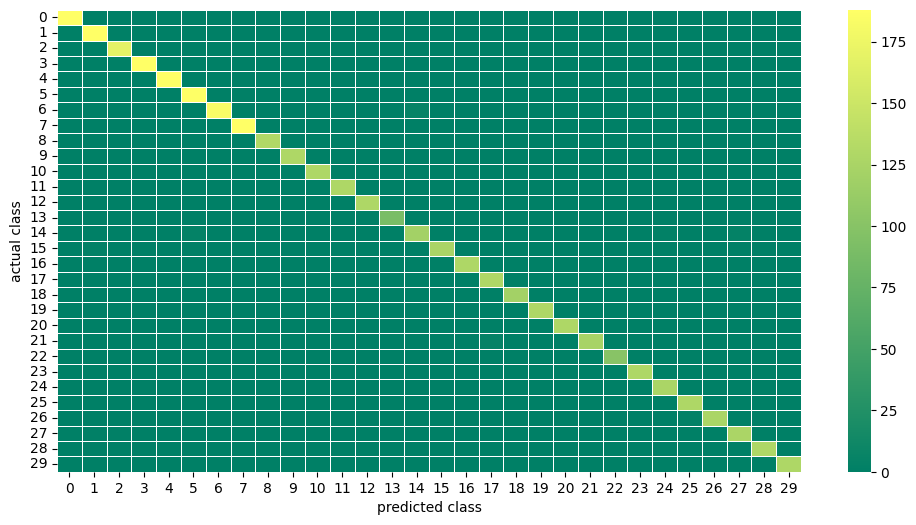

In [29]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.heatmap(cm,linewidth=0.5, cmap='summer')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

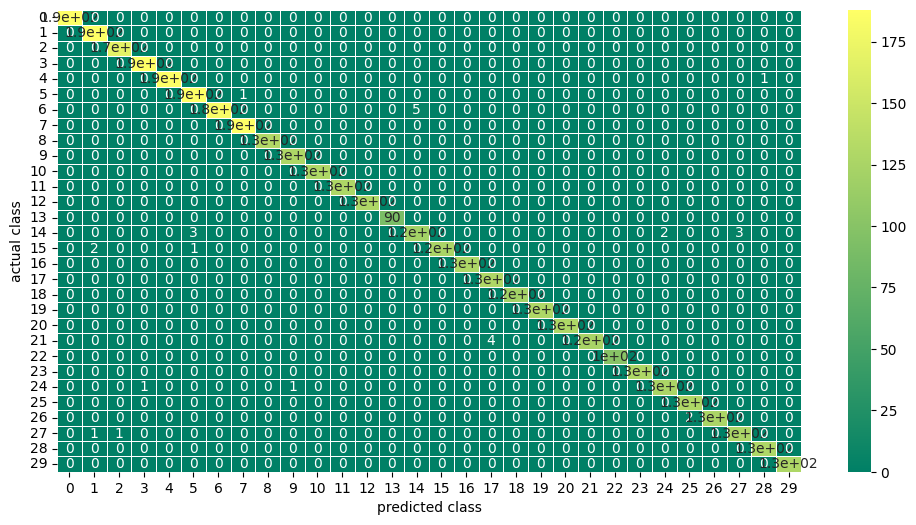

In [30]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.heatmap(cm,linewidth=0.5, cmap='summer' ,annot=True)
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

In [31]:
model.save("VGG16_version_2.keras")